---
title: Numerical Integration
date: 2019-09-01

# Put any other Academic metadata here...
---

Consider the integration of the function $f(x) = \exp \left( x^2 \right)$ between $[0,1]$.

It can easily be shown that

\begin{align}
\int_0^1 e^{-x^2} \, \mathrm{d}x = \dfrac{\sqrt{\pi}}{2}. \nonumber
\end{align}

First import the tools needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
from IPython.display import display, HTML
# some formatting for the graphs 

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

Next define the range to plot the function over and a number of point to evaluate the function.

In [2]:
x0 = -0.5
x1 = 1.5
n = 100

So we have a range and a function. 

In [3]:
x = np.linspace(x0, x1, n)
y = np.exp(-x**2)

In [4]:
f = lambda x : np.exp(-x**2)

Let $m$ be vector whose elements are the number of evaluations of the integral. 

In [5]:
m = np.array([4,8,16], dtype=int)

Compute and plot the successive approximations for the integral, as well as keeping track of the errors.

We will use the function [trapezoid](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid) to compute the integral according to

\begin{align}
\int_a^b f(x) \,\mathrm{d}x \approx \sum\limits_{k=1}^{M} \dfrac{f\left( x_{k-1}\right) + f\left(x_{k}\right)}{2} \Delta x_{k} \quad \mbox{where} \quad x_0 = a \quad \mbox{and} \quad x_M = b. \nonumber
\end{align}

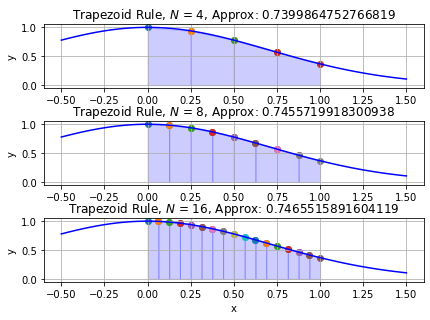

In [7]:
fig, ax = plt.subplots(m.size,1)
fig.tight_layout()
fig.subplots_adjust(top=0.99)
T = np.zeros((m.size,))
absolute_error = np.zeros((m.size,))
relative_error = np.zeros((m.size,))
for j,k in enumerate(m):
    nsteps = np.float(k)
    dx = 1.0 / nsteps
    x_approx = np.linspace(0.0, 1.0, num=k)
    T[j] = spi.trapz(f(x_approx), x_approx)
    for i in np.arange(0, nsteps):
        x_start = i*dx
        x_stop = (i+1)*dx 
        y_start = np.exp(-x_start**2) 
        y_stop = np.exp(-x_stop**2)
        ax[j].fill_between([x_start,x_stop], [y_start,y_stop], facecolor='b', edgecolor='b', alpha=0.2)
        ax[j].scatter([x_start,x_stop], [y_start,y_stop])

    ax[j].plot(x, y, 'b-')
    ax[j].set_title(r'Trapezoid Rule, $N$ = {}, Approx: {}'.format(k,T[j]))
    ax[j].grid(True)
    if (j==m.size-1):
        ax[j].set_xlabel('x')
    ax[j].set_ylabel('y')
    absolute_error[j] = np.abs(  np.sqrt(np.pi)/2.0 - T[j])
    relative_error[j] = np.abs( (np.sqrt(np.pi)/2.0 - T[j])/(np.sqrt(np.pi)/2.0 ) )

Tabulate the data and display it

In [8]:
results = np.vstack([m.T, relative_error, absolute_error])
import pandas as pd
df = pd.DataFrame(results.T, columns=["Order", "Relative Error", "Absolute Error"])
df.Order = df.Order.astype(int)
display(df.style.hide_index().set_caption("Results for $e^{(-x^2)}$"))

Order,Relative Error,Absolute Error
4,0.165015,0.146240
8,0.158712,0.140655
16,0.157607,0.139675
